In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,precision_score,recall_score,f1_score
import joblib
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV,StratifiedKFold
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.feature_selection import mutual_info_classif
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from imblearn.pipeline import Pipeline, make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

In [2]:
features = [
    "duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes", "land", 
    "wrong_fragment", "urgent", "hot", "num_failed_logins", "logged_in", "num_compromised", 
    "root_shell", "su_attempted", "num_root", "num_file_creations", "num_shells", 
    "num_access_files", "num_outbound_cmds", "is_host_login", "is_guest_login", "count", 
    "srv_count", "serror_rate", "srv_serror_rate", "rerror_rate", "srv_rerror_rate", 
    "same_srv_rate", "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", 
    "dst_host_srv_count", "dst_host_same_srv_rate", "dst_host_diff_srv_rate", 
    "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate", "dst_host_serror_rate", 
    "dst_host_srv_serror_rate", "dst_host_rerror_rate", "dst_host_srv_rerror_rate","Label"
]
training_data = pd.read_csv('/Users/younishubsey/desktop/kddcup.data_10_percent.csv',header = None)
test_data = pd.read_csv('/Users/younishubsey/desktop/corrected.csv',header = None)
training_data.columns = features
test_data.columns = features

In [3]:
test_data = test_data[test_data["Label"].isin(training_data["Label"].unique())]
print(test_data.shape)

(292300, 42)


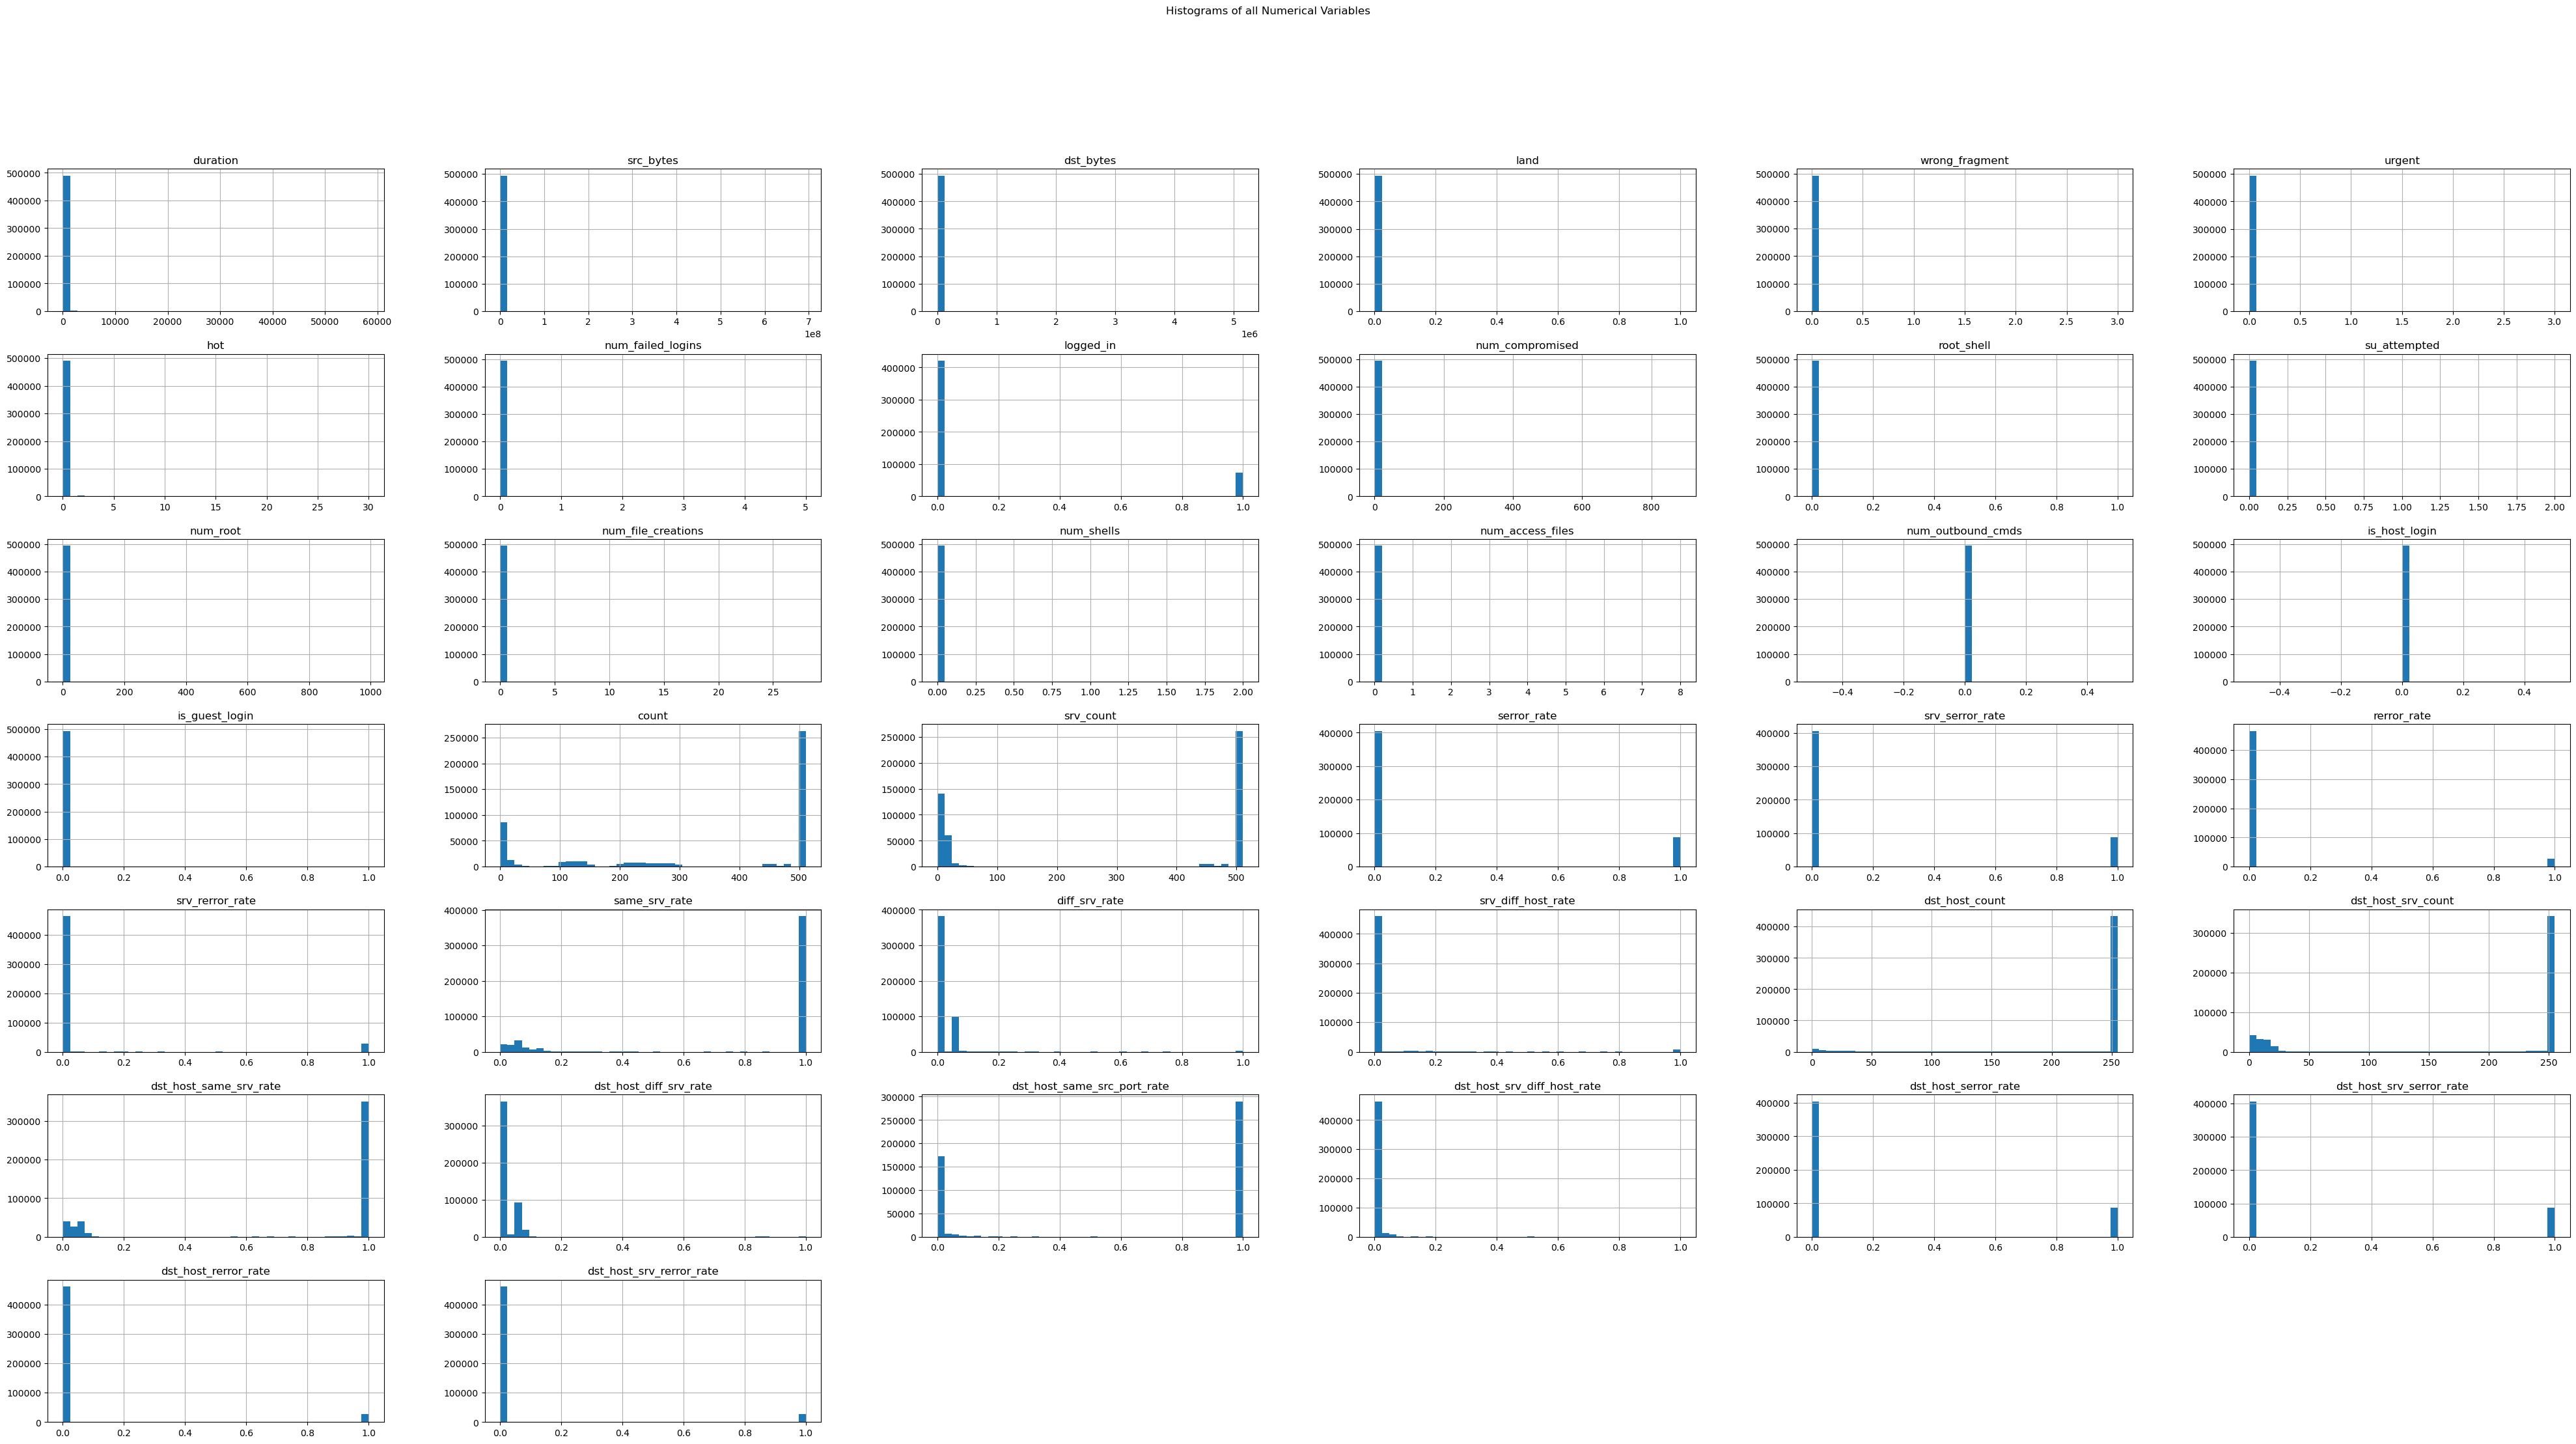

In [4]:
import matplotlib.pyplot as plt
training_data.hist(figsize=(50, 25), bins=42)
plt.suptitle("Histograms of all Numerical Variables")
plt.show()
#figure shows that alot of the features within the second columns of the kddcup99 dataset are near zero and redundant so we can take them out.

In [5]:
from scipy.stats import skew, kurtosis

numerical_cols = training_data.select_dtypes(include=['number']).columns
skewness_vals = training_data[numerical_cols].apply(skew)
kurtosis_vals = training_data[numerical_cols].apply(kurtosis)
skew_kurt = pd.DataFrame({'Skewness': skewness_vals, 
                          'Kurtosis': kurtosis_vals})
print(skew_kurt)

                               Skewness       Kurtosis
duration                      25.864779     942.520692
src_bytes                    699.211028  490579.380405
dst_bytes                    136.758863   20337.937538
land                         149.841583   22450.500045
wrong_fragment                21.718863     476.082701
urgent                       447.645645  217364.510230
hot                           32.629046    1127.005818
num_failed_logins            160.802128   37221.220352
logged_in                      1.979788       1.919560
num_compromised              417.528960  188119.443720
root_shell                    94.758641    8977.200111
su_attempted                 230.978976   55984.174689
num_root                     417.064570  188931.134352
num_file_creations           192.334182   43583.453805
num_shells                   108.873887   13169.165456
num_access_files              61.201266    7571.327426
num_outbound_cmds                   NaN            NaN
is_host_lo

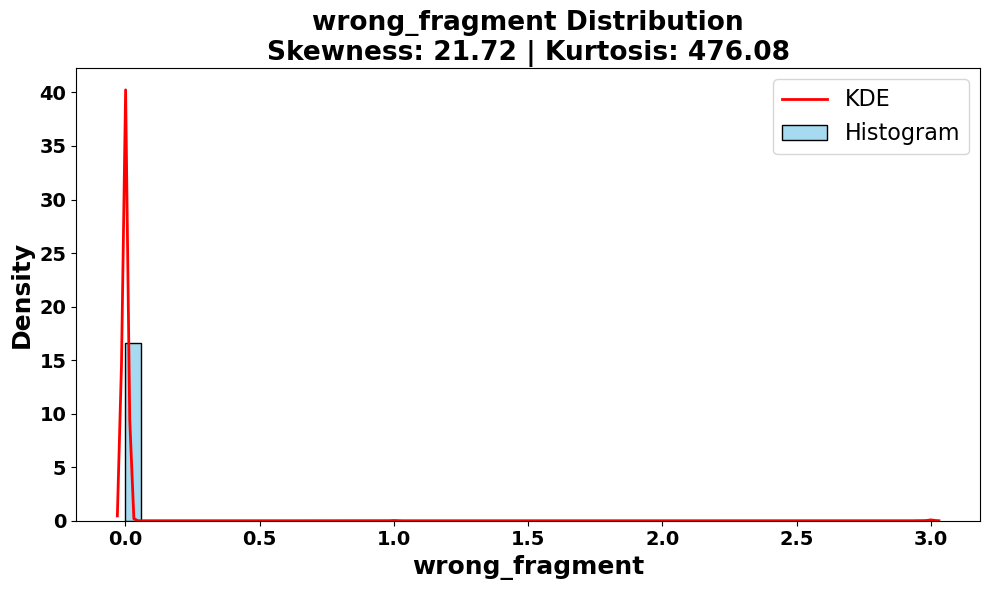

In [6]:

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
feature = "wrong_fragment"
data = training_data[feature]
skewness = 21.72
kurtosis = 476.08
plt.figure(figsize=(10, 6))
ax = sns.histplot(data, bins=50, color='skyblue', edgecolor='black', stat='density', label="Histogram")
if data.var() > 0:
    sns.kdeplot(data, color='red', linewidth=2, ax=ax, label="KDE")
ax.legend(fontsize=10)
plt.title(f"{feature} Distribution\nSkewness: {skewness:.2f} | Kurtosis: {kurtosis:.2f}", fontsize=19, fontweight='bold')
plt.xlabel(f"{feature}", fontsize=18, fontweight='bold')
plt.ylabel("Density", fontsize=18, fontweight='bold')
plt.xticks(fontsize=14,fontweight="bold")
plt.yticks(fontsize=14,fontweight="bold")
plt.legend(loc="upper right", fontsize=16)
plt.tight_layout()
plt.show()


<Figure size 8000x4000 with 0 Axes>

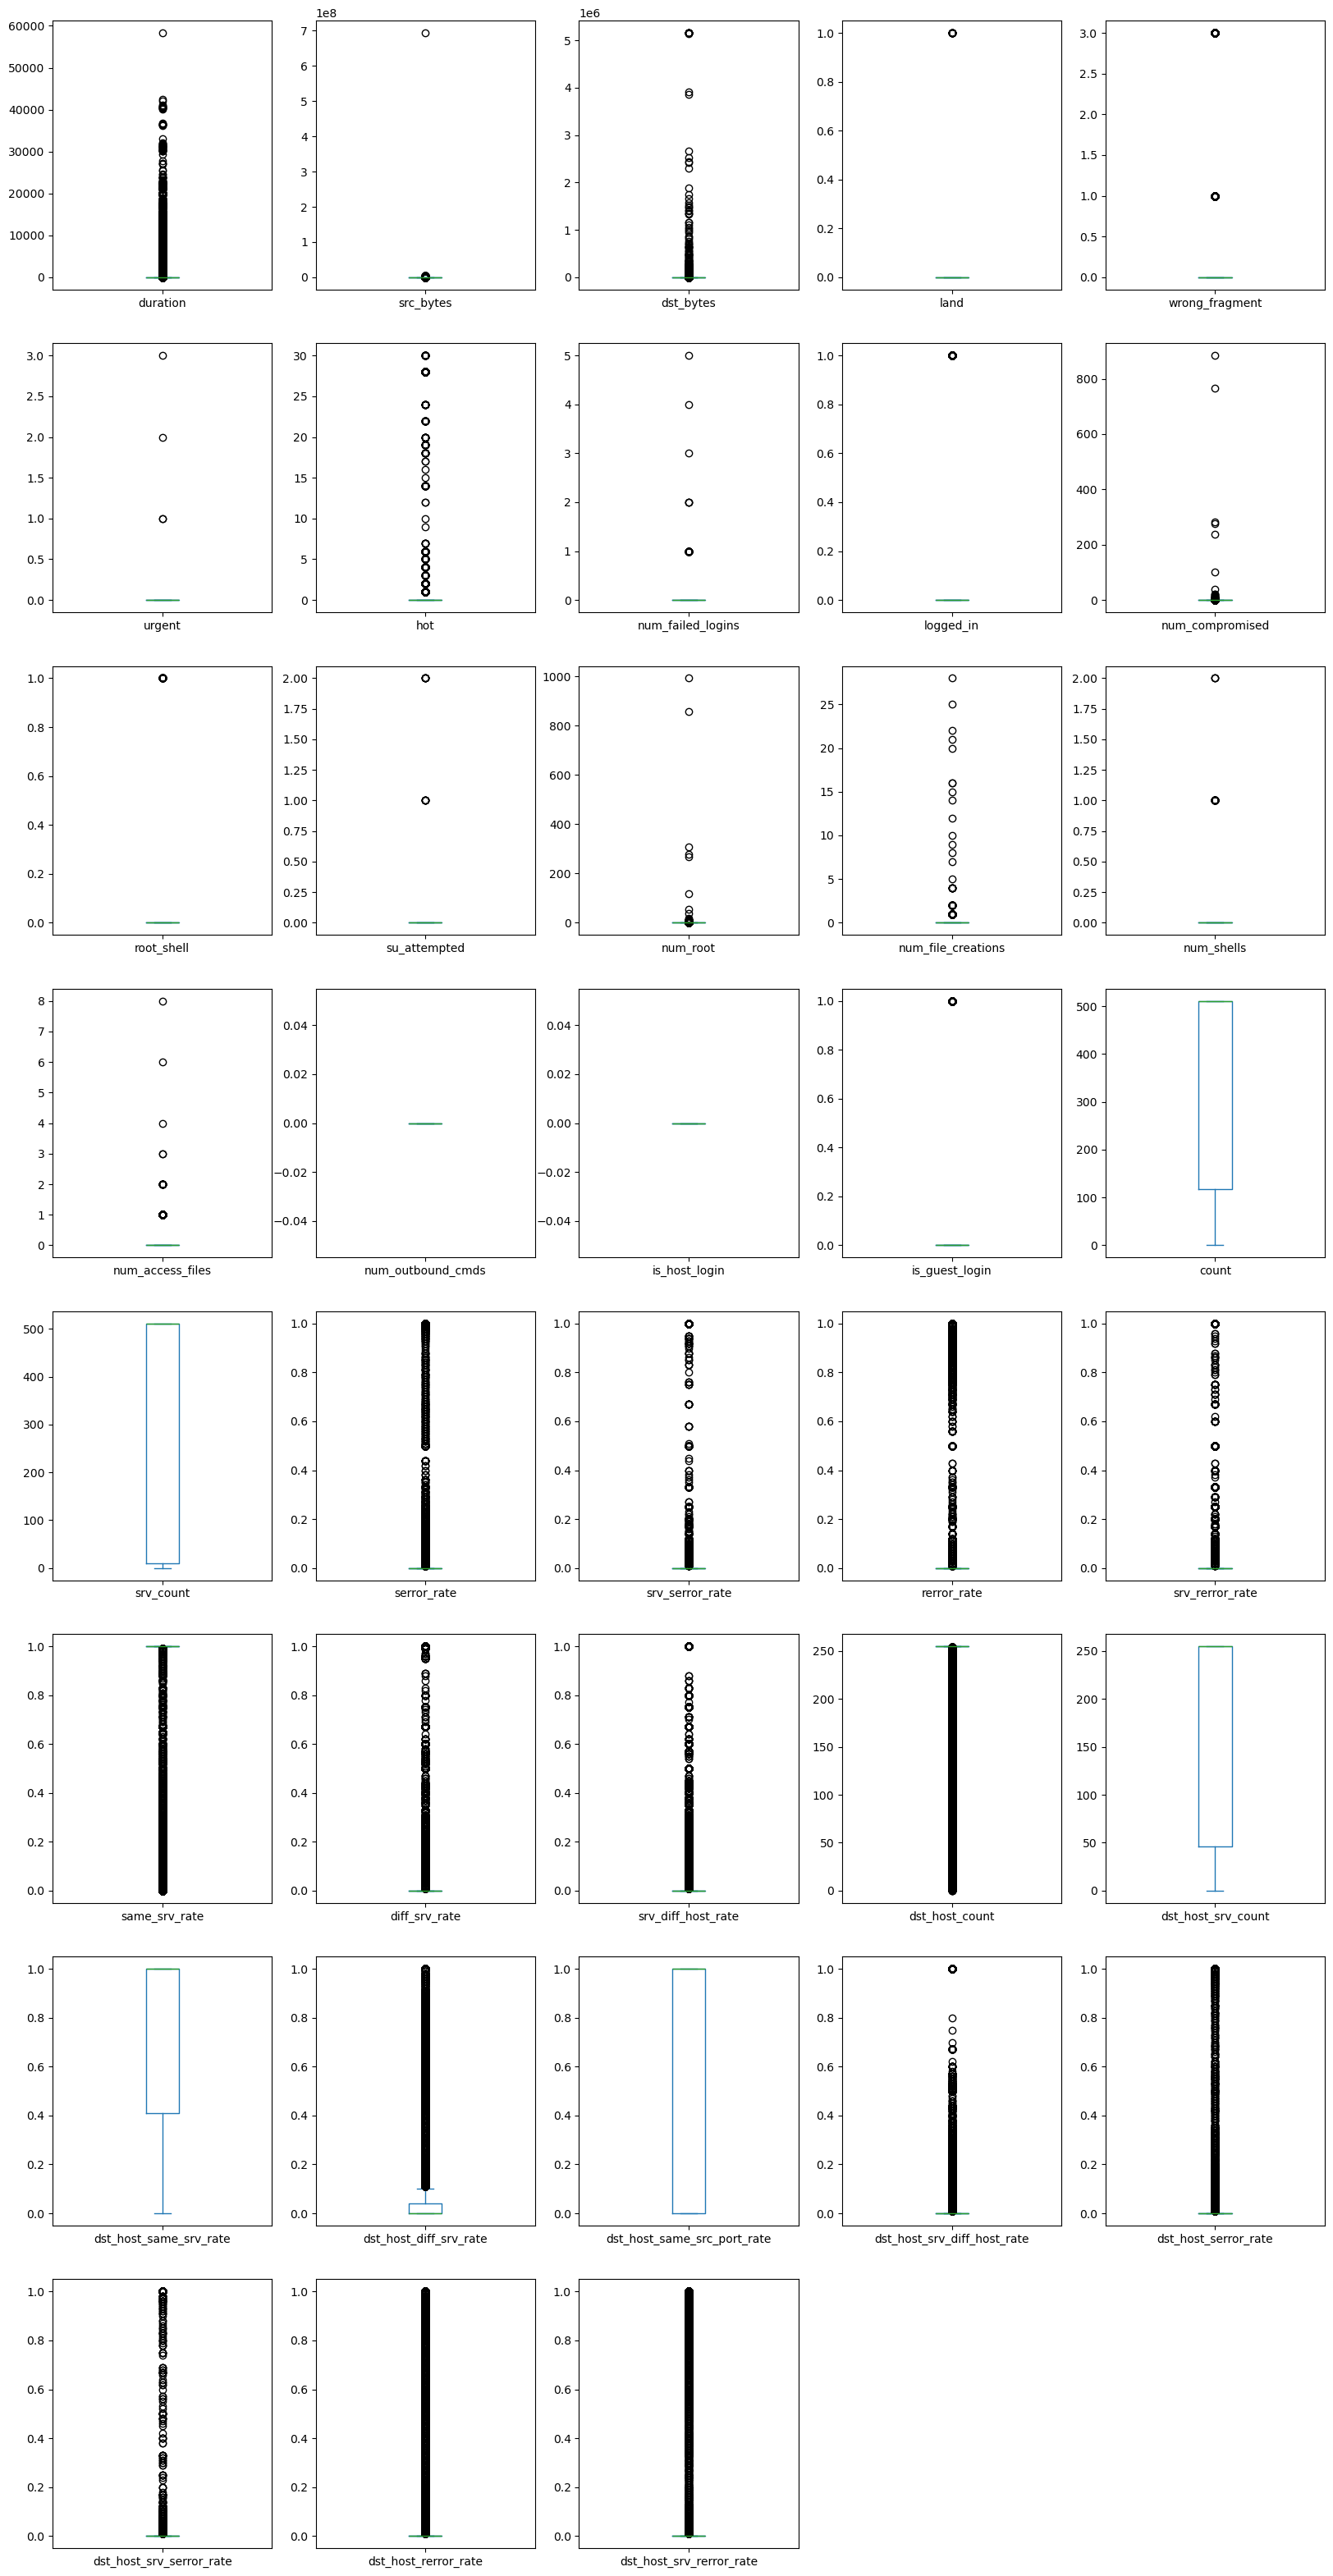

In [7]:
plt.figure(figsize=(80, 40))
training_data.plot(kind='box', subplots=True, layout=(8, 5), figsize=(20, 40))
plt.show()

In [8]:
training_data["Label"].value_counts()

Label
smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: count, dtype: int64

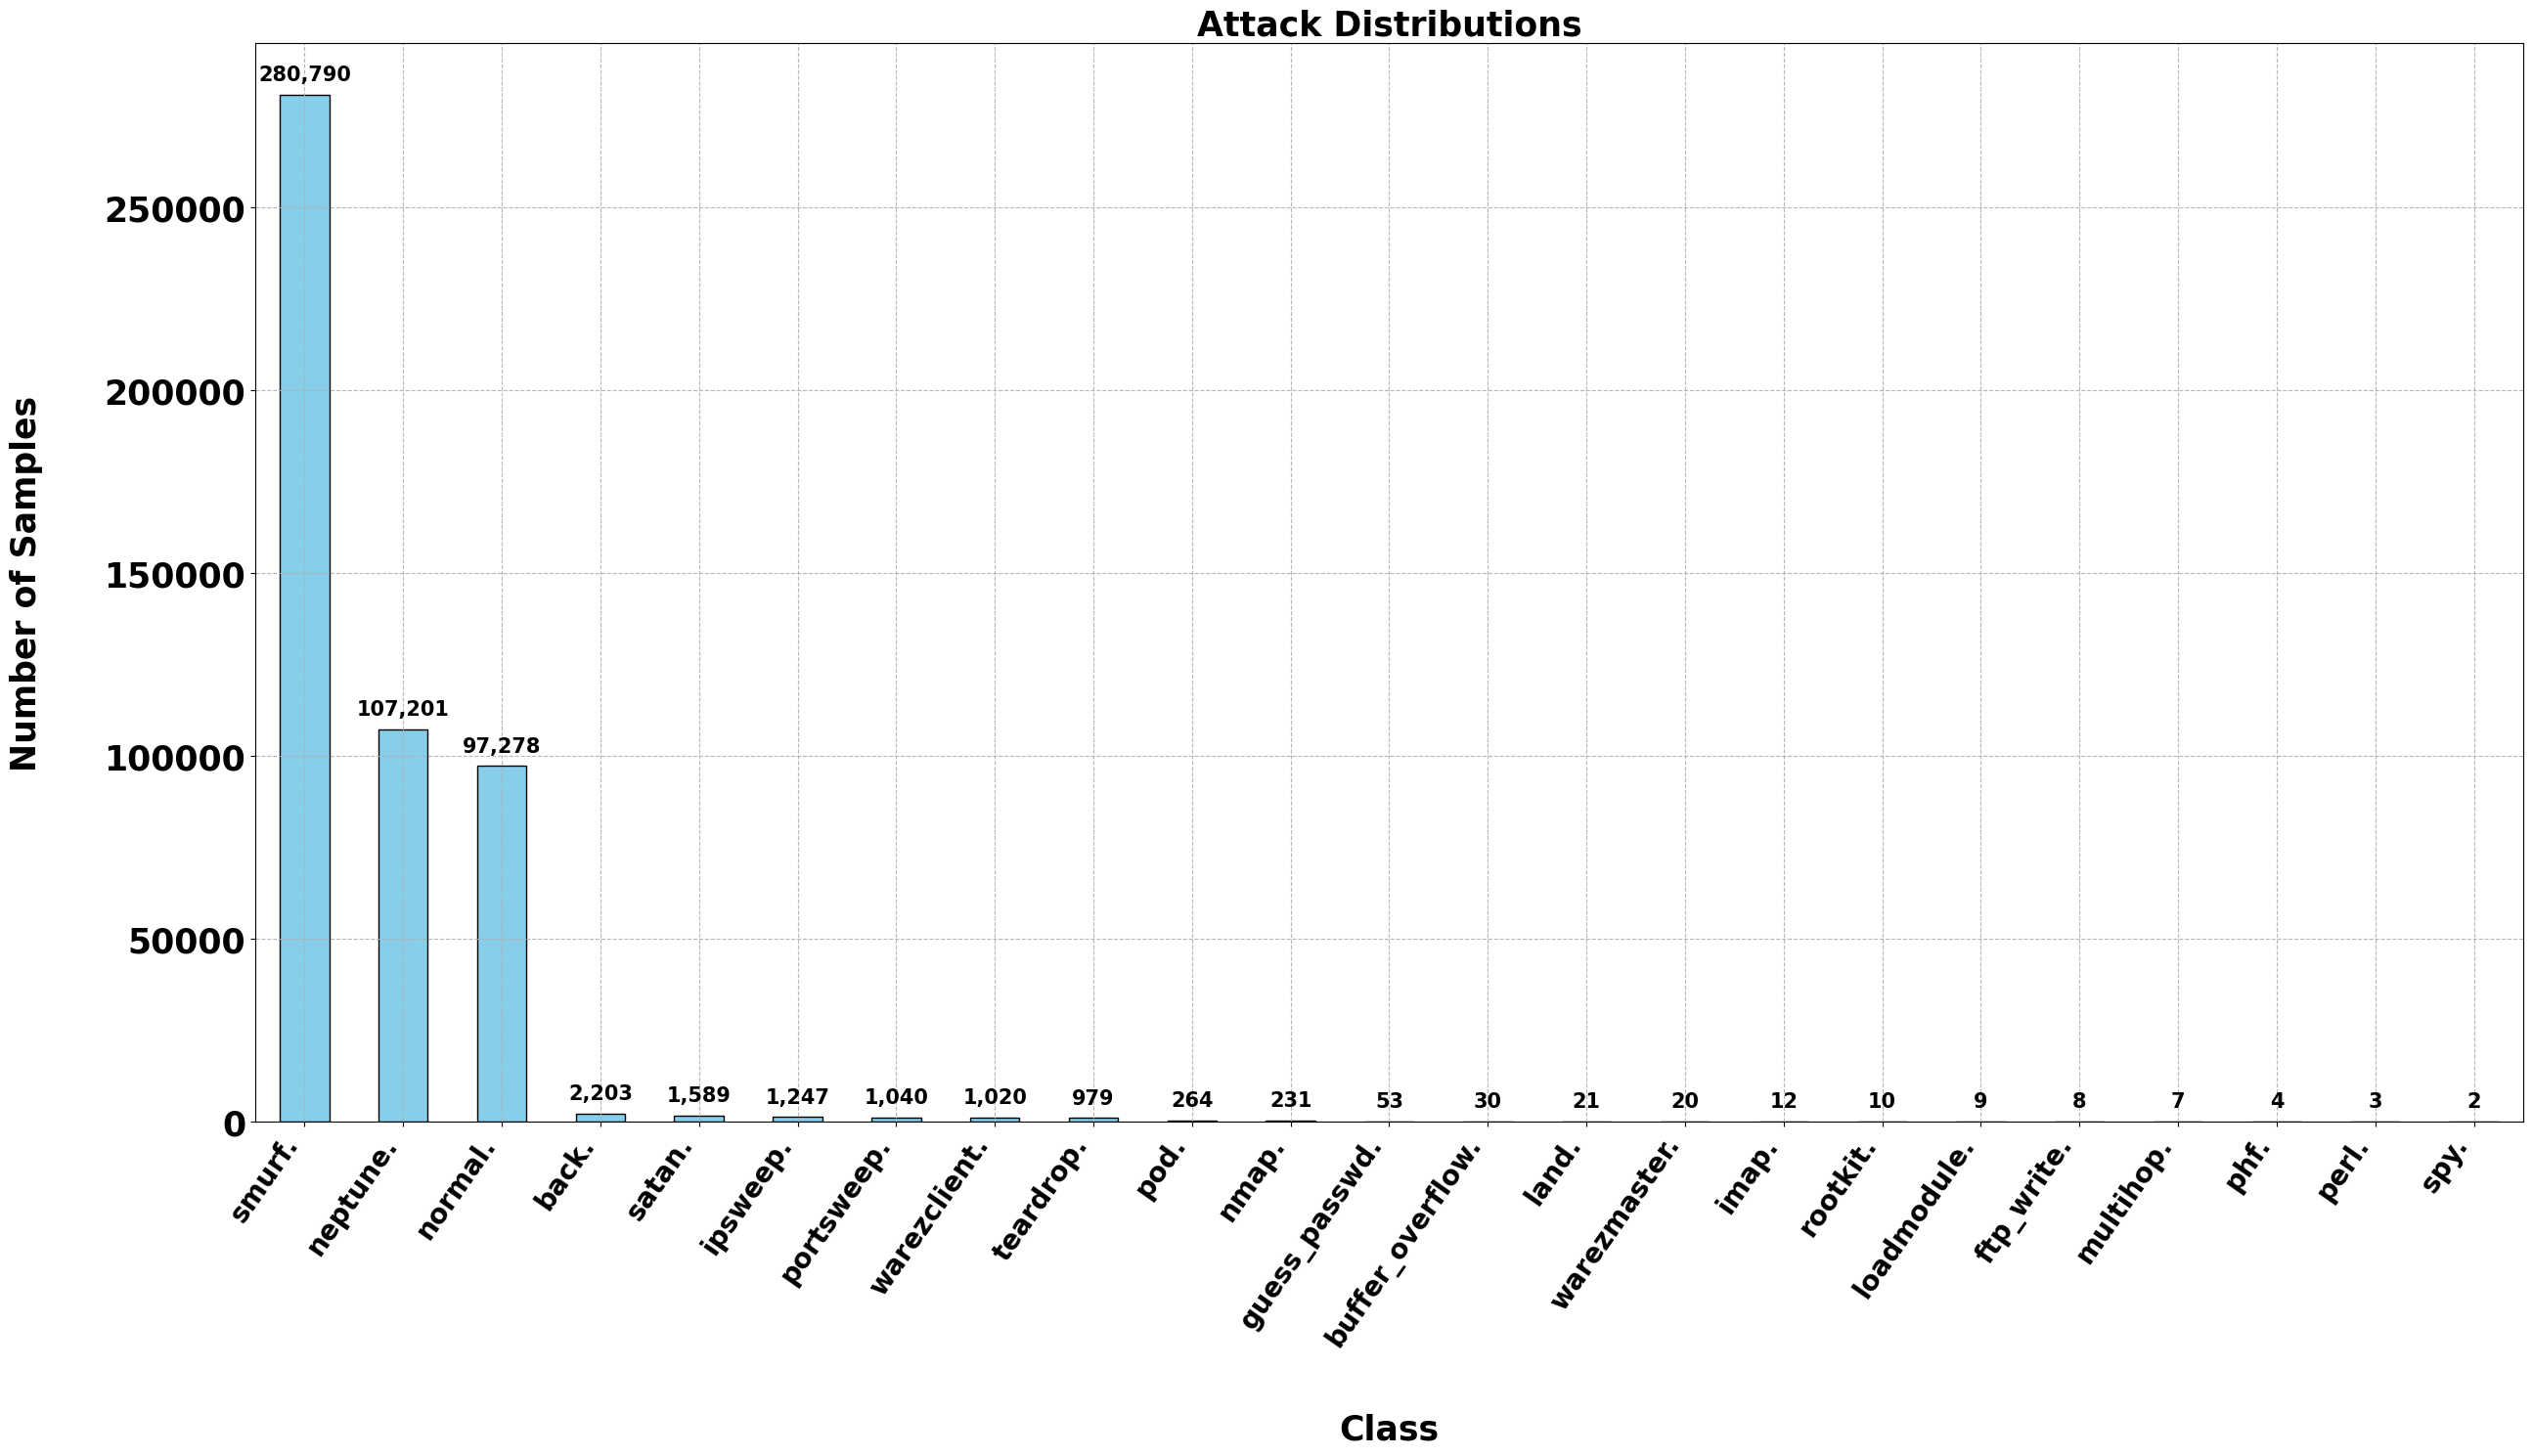

In [9]:
from matplotlib.ticker import MaxNLocator
class_counts = training_data["Label"].value_counts()
plt.figure(figsize=(26,15))
class_counts.plot(kind='bar',color="skyblue",edgecolor="black")
plt.title("Attack Distributions",fontsize=25,color = 'black',fontweight='bold')
plt.xlabel("Class",fontsize=25,fontweight='bold',labelpad=45)
plt.ylabel("Number of Samples",fontsize=25,fontweight='bold',labelpad=45)
plt.xticks(rotation=55,ha="right",fontsize=20,fontweight='bold')
plt.yticks(fontsize=25,fontweight = 'bold')
plt.grid(axis='y', linestyle='--', alpha=0.9)
plt.grid(axis='x', linestyle='--', alpha=0.9)
max_value = class_counts.max()
for i, (index, value) in enumerate(class_counts.items()):
    plt.text(i, value + (max_value * 0.01), f'{int(value):,}',
             ha='center', va='bottom', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()
#Figure(x) shows the class distribution within the dataset,from the figure it is evident that there is a large class imbalance, attacks such 
#as smurf and neptune dominate the class distribution whiles attacks such as multihop phf perl and spy are nearly non existant withhin the
#dataset with spy only having 2 samples. 3 attack types take up 80% of the samples shows the severe class imbalance within the kddcup99 dataset
#This type of class imbalance can affect the model as it wont be able to detect and classifiy these minority attacks that have low samples
#as they will be overlapped and outnumbered by attacks with larger amount of samples, this will reduce the performance of the model.

In [11]:
attack_categories={
'normal.' : 'Normal',

'back.' : 'DoS', 'land.' : 'DoS', 'neptune.' : 'DoS', 'pod.' : 'DoS', 'smurf.' : 'DoS','teardrop.' : 'DoS',

'buffer_overflow.':'U2R', 'loadmodule.':'U2R', 'perl.':'U2R', 'rootkit.': 'U2R',

'ftp_write.' : 'R2L' , 'guess_passwd.':'R2L', 'imap.':'R2L', 'multihop.':'R2L', 'phf.':'R2L', 'spy.':'R2L', 'warezclient.':'R2L', 'warezmaster.':'R2L',

'ipsweep.':'Probing', 'nmap.':'Probing', 'portsweep.':'Probing', 'satan.': 'Probing'
}

training_data['attack_sections']=training_data['Label'].map(attack_categories)
test_data['attack_sections']=test_data['Label'].map(attack_categories)

In [12]:
#U2R is very small so we need to get rid of it. as this can be just seen as noise.
training_data['attack_sections'] = training_data['Label'].map(attack_categories)
test_data['attack_sections'] = test_data['Label'].map(attack_categories)
print(training_data['attack_sections'].value_counts())

attack_sections
DoS        391458
Normal      97278
Probing      4107
R2L          1126
U2R            52
Name: count, dtype: int64


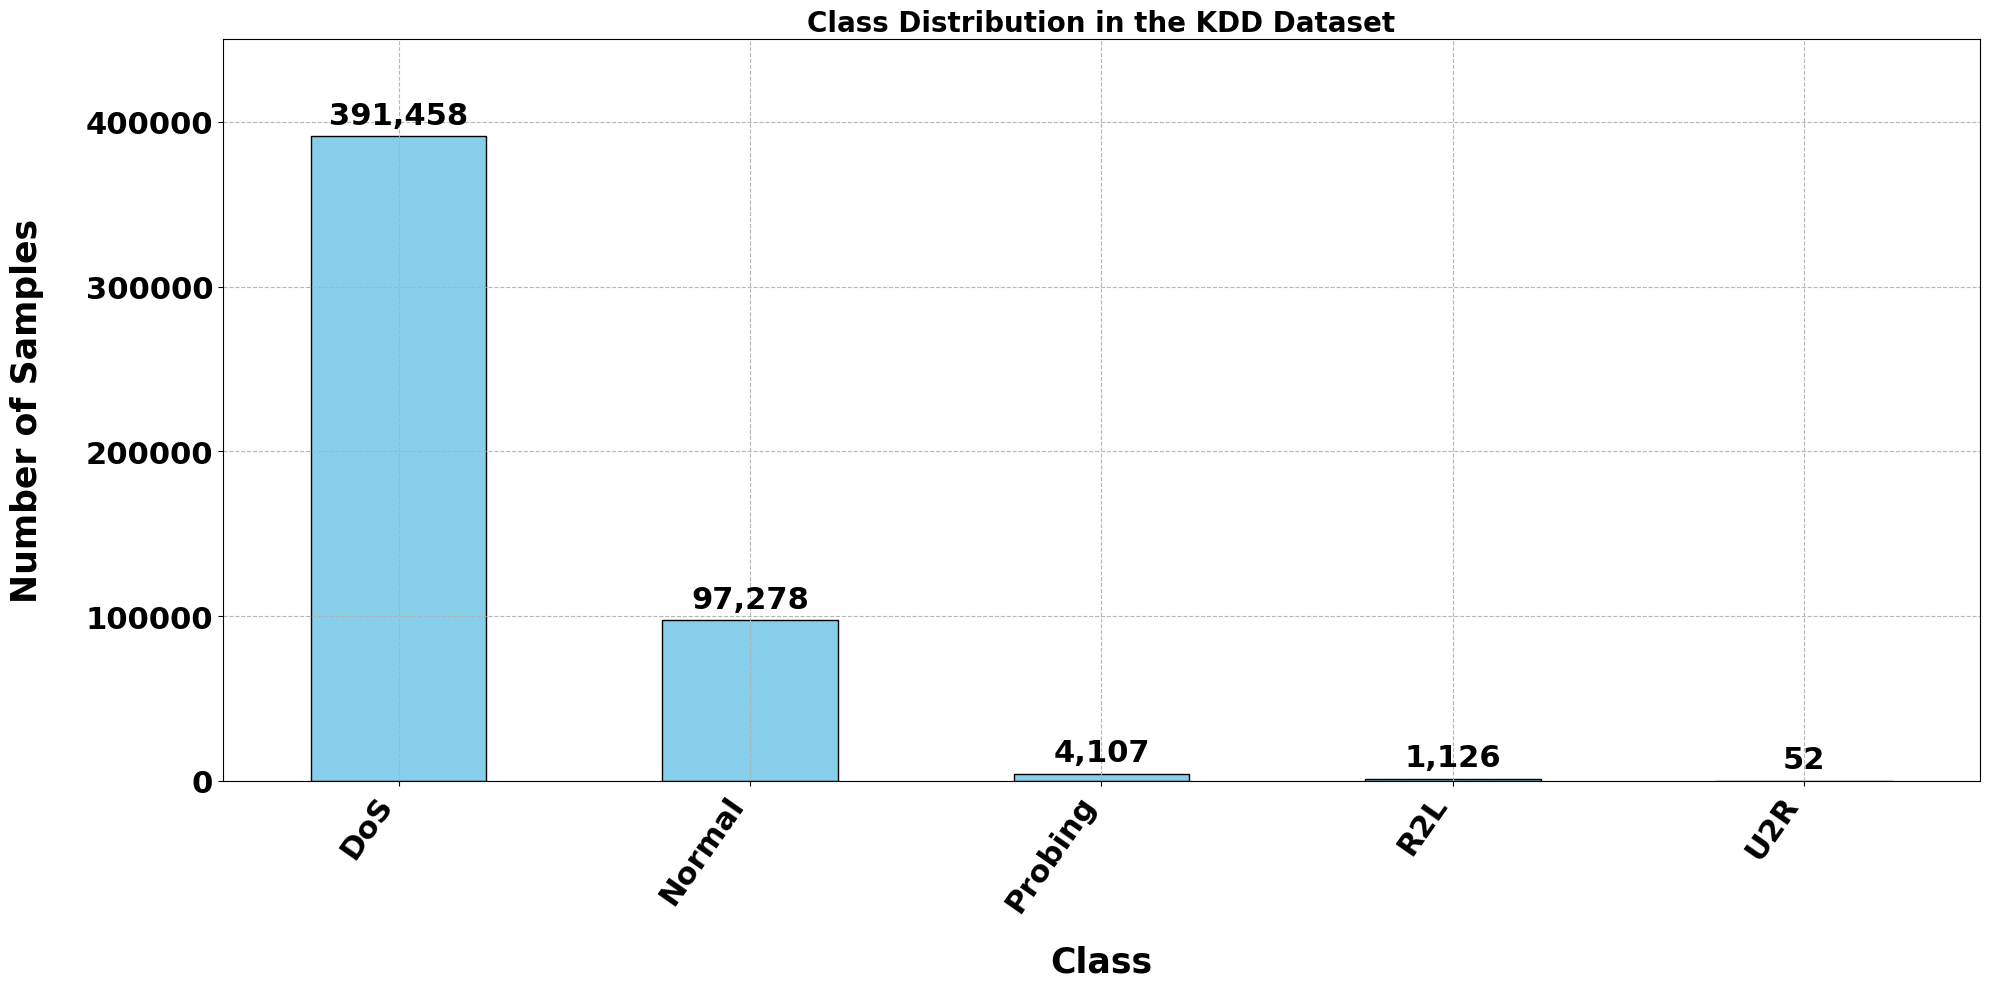

In [13]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
attack_sections_count = training_data["attack_sections"].value_counts()
plt.figure(figsize=(20, 10))
bars = attack_sections_count.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Class Distribution in the KDD Dataset", fontsize=20, color='black', fontweight='bold')
plt.xlabel("Class", fontsize=25, fontweight='bold', labelpad=20)
plt.ylabel("Number of Samples", fontsize=25, fontweight='bold', labelpad=30)
plt.xticks(rotation=55, ha="right", fontsize=22,fontweight = 'bold')
plt.yticks(fontsize=22,fontweight = 'bold')
plt.grid(axis='y', linestyle='--', alpha=0.9)
plt.grid(axis='x', linestyle='--', alpha=0.9)
max_value = attack_sections_count.max()
plt.ylim(0, max_value * 1.15)

for i, (index, value) in enumerate(attack_sections_count.items()):
    plt.text(i, value + (max_value * 0.01), f'{int(value):,}',
             ha='center', va='bottom', fontsize=22, fontweight='bold')
plt.tight_layout()
plt.show()
# Due to some of the attacks samples being so low such as spy having 2 samples, this would be treated as noise within the model 
#due to the samples being so low , therefore to prevent this we combined the attacks into 5 attack types such as Dos,Normal,Probing,R2L,U2R
#However even after doing this U2R had samples that were too low compared to toher attack categories, therefore we removed this attack 
#category as the samples were too low.


In [16]:
training_data = training_data[training_data['attack_sections'] != 'U2R']

In [17]:
test_data = test_data[test_data['attack_sections'] != 'U2R']

In [18]:
#we used a label encoder for the EDA section but used one hot encode for the input variables during the 
#building of the models, this is because one hot encoding can make it difficult to do eda as it creates
#multiple versions of the same feature given into the one hot encoder so for the sake of eda label encodiing was used but later 
#for our models one hot encding was use.
label_encoders = {} 

for col in ["protocol_type", "service", "flag","Label","attack_sections"]:
    label_encoders[col] = LabelEncoder()  
    training_data[col] = label_encoders[col].fit_transform(training_data[col])
for col in ["protocol_type", "service", "flag","Label","attack_sections"]:
    test_data[col] = test_data[col].apply(lambda x: x if x in label_encoders[col].classes_ else "unknown")

    label_encoders[col].classes_ = np.append(label_encoders[col].classes_, "unknown")

    test_data[col] = label_encoders[col].transform(test_data[col])

unknown_values = {}
for col in["service"]:
    unknown_values[col] = (test_data[col] == label_encoders[col].transform(["unknown"])[0]).sum()

test_data = test_data[test_data["service"] != label_encoders["service"].transform(["unknown"])[0]]
train_categories = {col: set(training_data[col]) for col in ["protocol_type", "service", "flag", "Label","attack_sections"]}
test_categories = {col: set(test_data[col]) for col in ["protocol_type", "service", "flag", "Label","attack_sections"]}
unseen_values = {col: test_categories[col] - train_categories[col] for col in test_categories}



/var/folders/2d/7dqps2_n0zx5l2_fx7bz690h0000gn/T/ipykernel_91574/2266523144.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data[col] = label_encoders[col].fit_transform(training_data[col])
/var/folders/2d/7dqps2_n0zx5l2_fx7bz690h0000gn/T/ipykernel_91574/2266523144.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data[col] = label_encoders[col].fit_transform(training_data[col])
/var/folders/2d/7dqps2_n0zx5l2_fx7bz690h0000gn/T/ipykernel_91574/2266523144.py:9: SettingWithCopyWarning: 

In [31]:
x_train =training_data.drop(columns=['Label','attack_sections'])
y_train = training_data['attack_sections']
x_test = test_data.drop(columns=['Label','attack_sections'])
y_test = test_data['attack_sections']

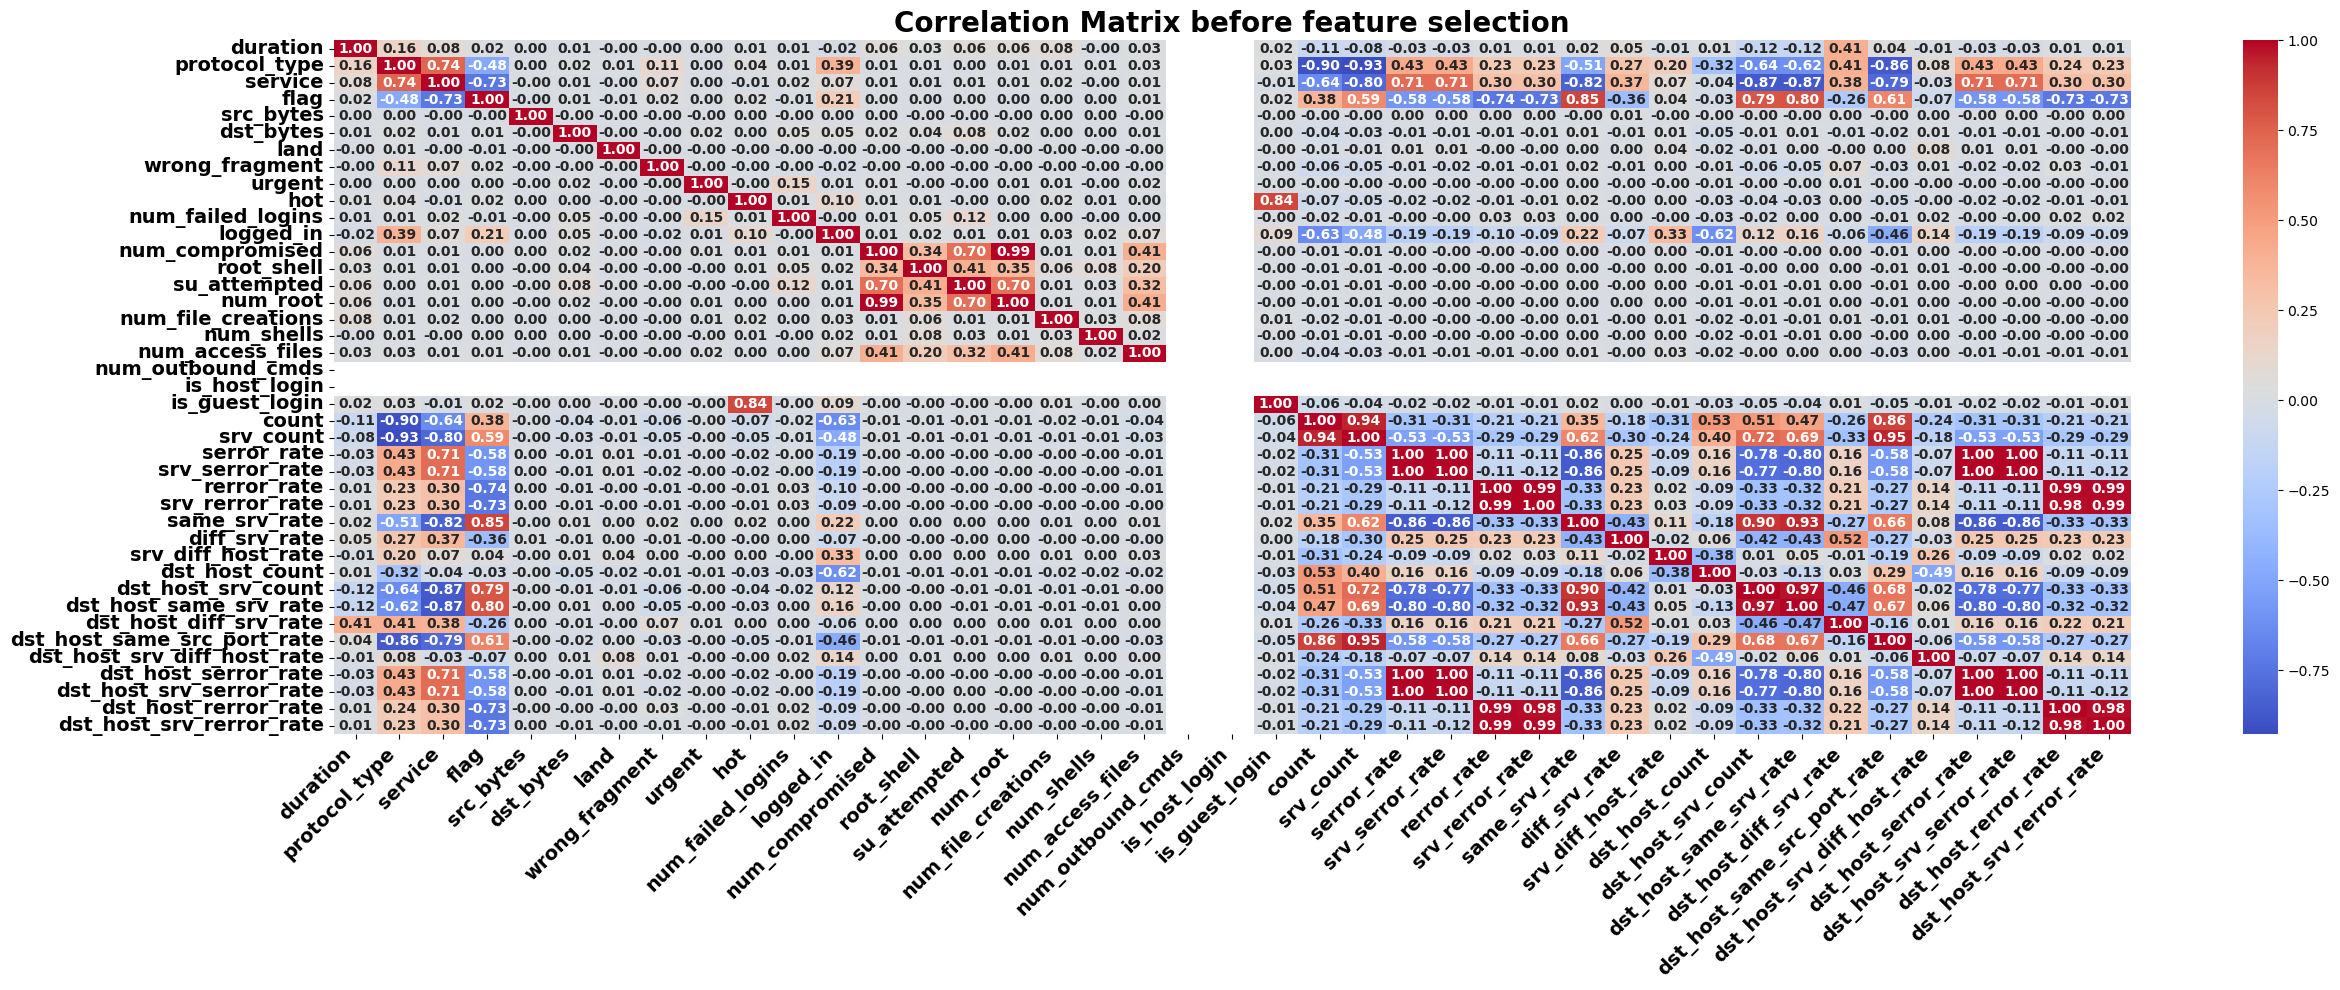

In [33]:
plt.figure(figsize=(26, 10))
matrix = x_train.corr()
ax = sns.heatmap(matrix, annot=True, fmt=".2f", cmap='coolwarm',annot_kws={"size": 10, "weight": "bold"})
plt.title("Correlation Matrix before feature selection",fontsize=20,fontweight = "bold")
ax.set_xticklabels(
    ax.get_xticklabels(),
    fontsize=14,
    fontweight='bold',
    rotation=45,
    ha='right'
)
ax.set_yticklabels(
    ax.get_yticklabels(),
    fontsize=14,
    fontweight='bold'
)
plt.tight_layout()
plt.show()

In [35]:
 x_train.drop(columns = ["num_outbound_cmds","is_host_login"],inplace=True)
 x_test.drop(columns = ["num_outbound_cmds","is_host_login"],inplace=True)

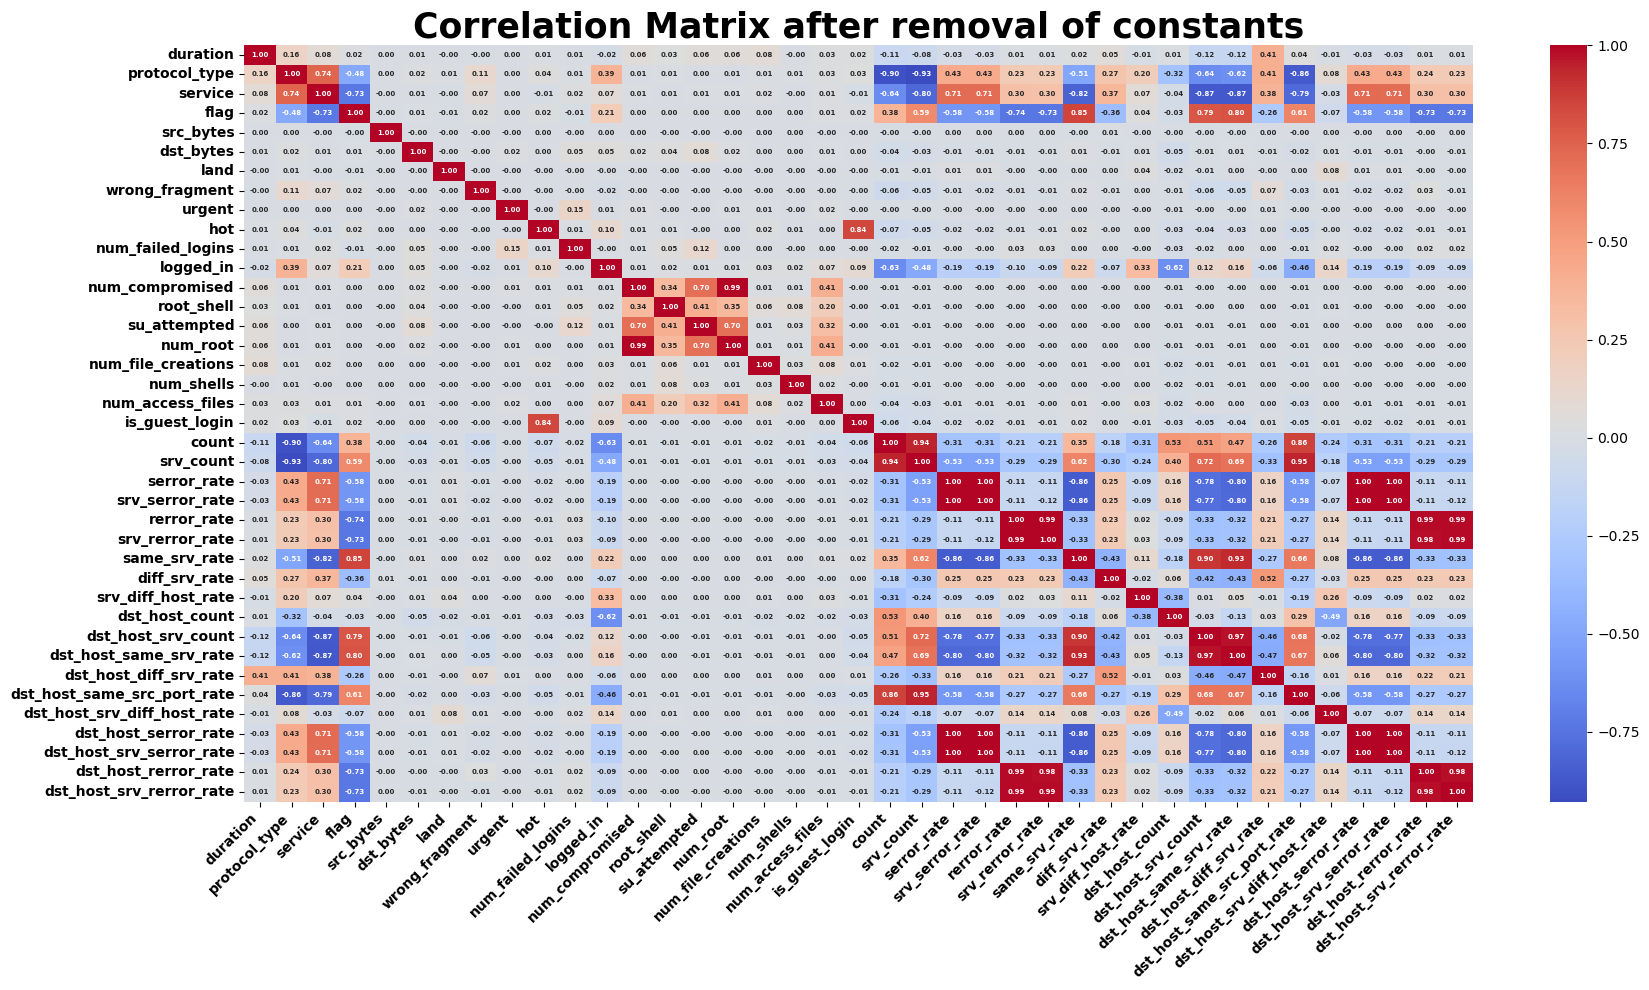

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(18, 10))
matrix = x_train.corr()
ax = sns.heatmap(matrix, annot=True, fmt=".2f", cmap='coolwarm',annot_kws={"size": 5, "weight": "bold"})
plt.title("Correlation Matrix after removal of constants", fontsize=25, fontweight='bold')
ax.set_xticklabels(
    ax.get_xticklabels(),
    fontsize=10,
    fontweight='bold',
    rotation=45,
    ha='right'
)
ax.set_yticklabels(
    ax.get_yticklabels(),
    fontsize=10,
    fontweight='bold'
)
plt.tight_layout()
plt.show()

In [39]:
import numpy as np
high_corr_features = np.where(np.abs(matrix) > 0.7)
high_corr_pairs = [
    (matrix.index[i], matrix.columns[j])
    for i, j in zip(*high_corr_features)
    if i != j and i < j 
]
print("\n Highly Correlated Feature Pairs with a correaltion > 0.7):")
for feature1, feature2 in high_corr_pairs:
    print(f"{feature1} ↔ {feature2} (Correlation: {matrix.loc[feature1, feature2]:.2f})")


 Highly Correlated Feature Pairs with a correaltion > 0.7):
protocol_type ↔ service (Correlation: 0.74)
protocol_type ↔ count (Correlation: -0.90)
protocol_type ↔ srv_count (Correlation: -0.93)
protocol_type ↔ dst_host_same_src_port_rate (Correlation: -0.86)
service ↔ flag (Correlation: -0.73)
service ↔ srv_count (Correlation: -0.80)
service ↔ serror_rate (Correlation: 0.71)
service ↔ srv_serror_rate (Correlation: 0.71)
service ↔ same_srv_rate (Correlation: -0.82)
service ↔ dst_host_srv_count (Correlation: -0.87)
service ↔ dst_host_same_srv_rate (Correlation: -0.87)
service ↔ dst_host_same_src_port_rate (Correlation: -0.79)
service ↔ dst_host_serror_rate (Correlation: 0.71)
service ↔ dst_host_srv_serror_rate (Correlation: 0.71)
flag ↔ rerror_rate (Correlation: -0.74)
flag ↔ srv_rerror_rate (Correlation: -0.73)
flag ↔ same_srv_rate (Correlation: 0.85)
flag ↔ dst_host_srv_count (Correlation: 0.79)
flag ↔ dst_host_same_srv_rate (Correlation: 0.80)
flag ↔ dst_host_rerror_rate (Correlation

In [ ]:
from sklearn.feature_selection import mutual_info_classif
MI = mutual_info_classif(x_train, y_train)
MI = pd.Series(MI)
MI.index = x_train.columns
MI.sort_values(ascending=False)

In [ ]:
#drop = [same_srv_rate,serror_rate,srv_count,dst_host_same_src_port_rate,

In [ ]:
selected_features = MI[MI > 0.01].index.tolist()

In [ ]:
print(selected_features)

In [ ]:
#this lead to these list of features to be removed. as can be seen most of the features removed were
#the content features as the histogram correlation matrix and MI all unanimously showed that these features 
#are contributing near zero.the other features removed such as srv_count and the rest was due to them having the lower MI value 
#compared to its correlated feature in the correlation matrix

drop_features = [  'hot', 'num_failed_logins', 'num_compromised', 'root_shell', 'su_attempted',
    'num_root', 'num_file_creations', 'num_shells', 'num_access_files',
    'is_guest_login',

  
    'srv_count', 'srv_serror_rate', 'srv_rerror_rate',
    'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_same_src_port_rate',
    'dst_host_serror_rate', 'dst_host_srv_serror_rate',
    'dst_host_rerror_rate', 'dst_host_srv_rerror_rate','flag','protocol_type','service'
]

In [ ]:
x_train.drop(columns = drop_features,inplace = True)
x_test.drop(columns = drop_features,inplace = True)

In [ ]:
#this is the final correlation matrix after the features have been removed,Leaving only 18 features from the 42
#original features.
plt.figure(figsize=(15, 10))
matrix = x_train.corr()
sns.heatmap(matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(18, 10))
matrix = x_train.corr()
ax = sns.heatmap(matrix, annot=True, fmt=".2f", cmap='coolwarm',annot_kws={"size": 16, "weight": "bold"})
plt.title("Correlation Matrix", fontsize=25, fontweight='bold')
ax.set_xticklabels(
    ax.get_xticklabels(),
    fontsize=18,
    fontweight='bold',
    rotation=45,
    ha='right'
)
ax.set_yticklabels(
    ax.get_yticklabels(),
    fontsize=18,
    fontweight='bold'
)
plt.tight_layout()
plt.show()

In [88]:
#Sampling :
#From the previous figure in our data undsertanding seciton above figure(x) the dataset is very imblanced with the 
#Highest class being Dos with 391458 and the lowest being R2L with 1126 this is a significant class imbalance and can cause The Machine Learning
#models to perform worse as they would miss the minority classes as they have too few samples, a class imabalcne of this size 
#can cause the majority classes like Dos and normal to overlap and hide the minority classess leading to the minority classes being 
#misclassified as the majoirty class or not being classified at all due to being hid unfer the majority classes with greater samples.

# to prevent this a sampling technique is needed to balance the dataset and give the smaller classes a chance to be classfied,Randomoversmaplomg
#was a techniwue that could of been used however there was concern over the fact that it creates a copy of the same samples which coul affect 
#the performance of the model,Smote was also considered however due to large class overlap seen in figure(Z-before smote tsne plot)
#Smote was feared to not be enough.




#Therefore smote-tomek was applied

smote_tomek = SMOTETomek(sampling_strategy = "not majority",random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(x_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [89]:
from sklearn.manifold import TSNE
import seaborn as sns

In [90]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_orig_scaled = scaler.fit_transform(x_train)
X_resampled_scaled = scaler.transform(X_resampled)

In [91]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne_orig = tsne.fit_transform(X_orig_scaled)
X_tsne_resampled = tsne.fit_transform(X_resampled_scaled)

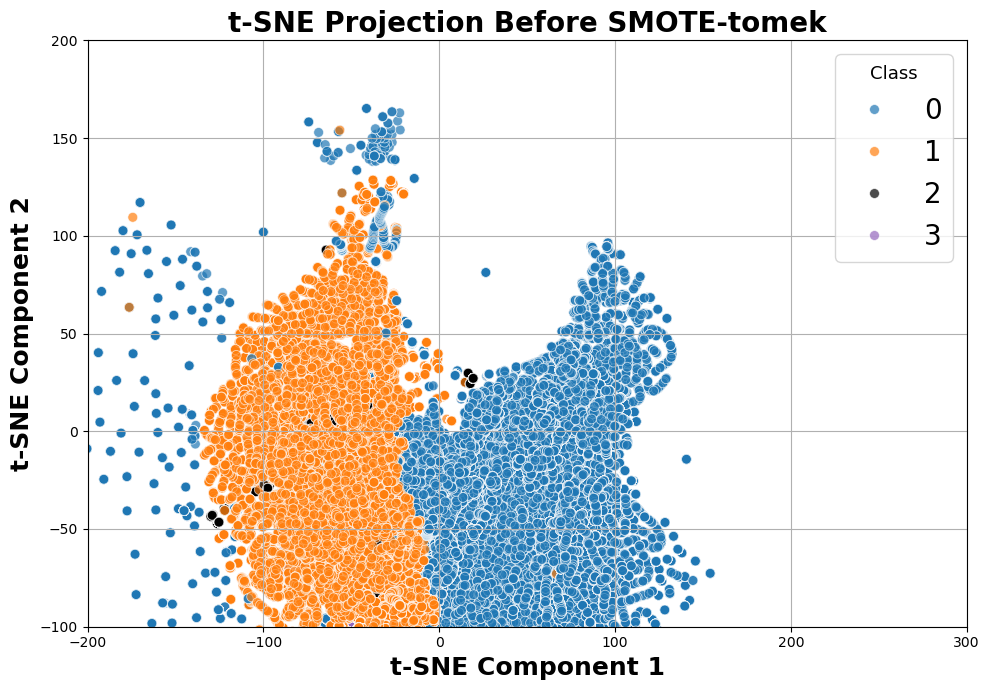

In [93]:
plt.figure(figsize=(10, 7))
palette = ['#1f77b4', '#ff7f0e', "#000000", '#9467bd']
sns.scatterplot(
    x=X_tsne_orig[:, 0],
    y=X_tsne_orig[:, 1],
    hue=y_train,
    palette=palette,
    s=50,
    alpha=0.7
)
plt.title("t-SNE Projection Before SMOTE-tomek", fontsize=20,fontweight = "bold")
plt.xlabel("t-SNE Component 1",fontsize=18,fontweight="bold")
plt.ylabel("t-SNE Component 2",fontsize =18,fontweight="bold")
plt.legend(title="Class", title_fontsize=13, fontsize=20)
plt.grid(True)
plt.xlim(-200, 300)
plt.ylim(-100, 200)
plt.tight_layout()
plt.show()

/var/folders/2d/7dqps2_n0zx5l2_fx7bz690h0000gn/T/ipykernel_20213/521186170.py:20: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


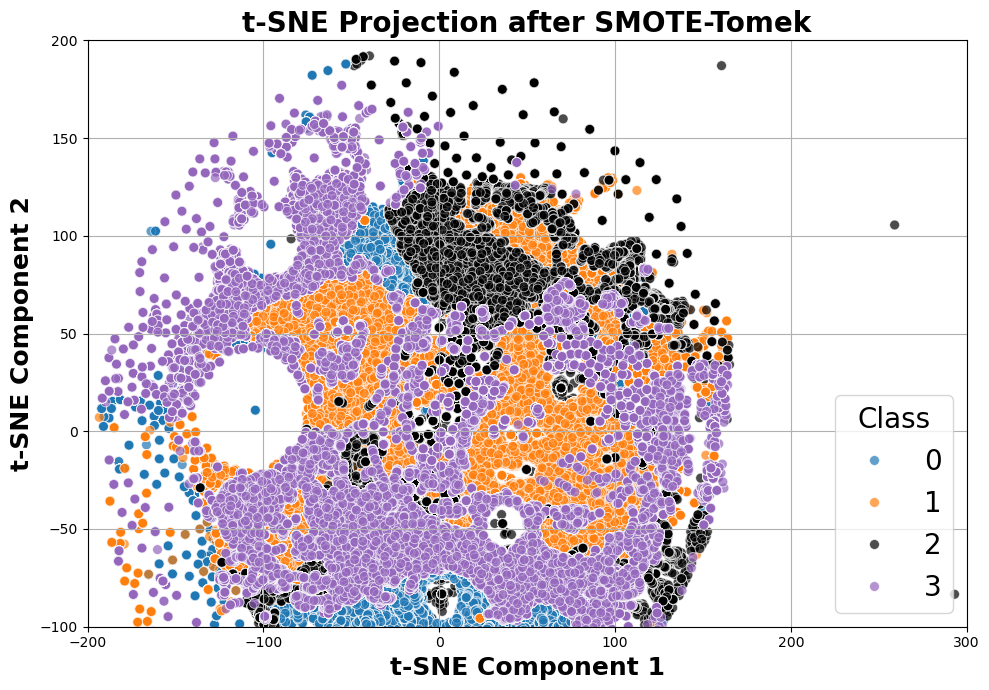

In [94]:
#Not Majority
plt.figure(figsize=(10, 7))
palette = ['#1f77b4', '#ff7f0e', '#000000', '#9467bd']
sns.scatterplot(
    x=X_tsne_resampled[:, 0],
    y=X_tsne_resampled[:, 1],
    hue=y_resampled,
    palette=palette,
    s=50,
    alpha=0.7
)
plt.title("t-SNE Projection after SMOTE-Tomek", fontsize=20,fontweight ="bold")
plt.xlabel("t-SNE Component 1",fontsize = 18,fontweight="bold")
plt.ylabel("t-SNE Component 2",fontsize =18,fontweight = "bold")
plt.legend(title="Class", title_fontsize=20, fontsize=20)
plt.grid(True)
plt.xlim(-200, 300)
plt.ylim(-100, 200)
plt.tight_layout()
plt.show()

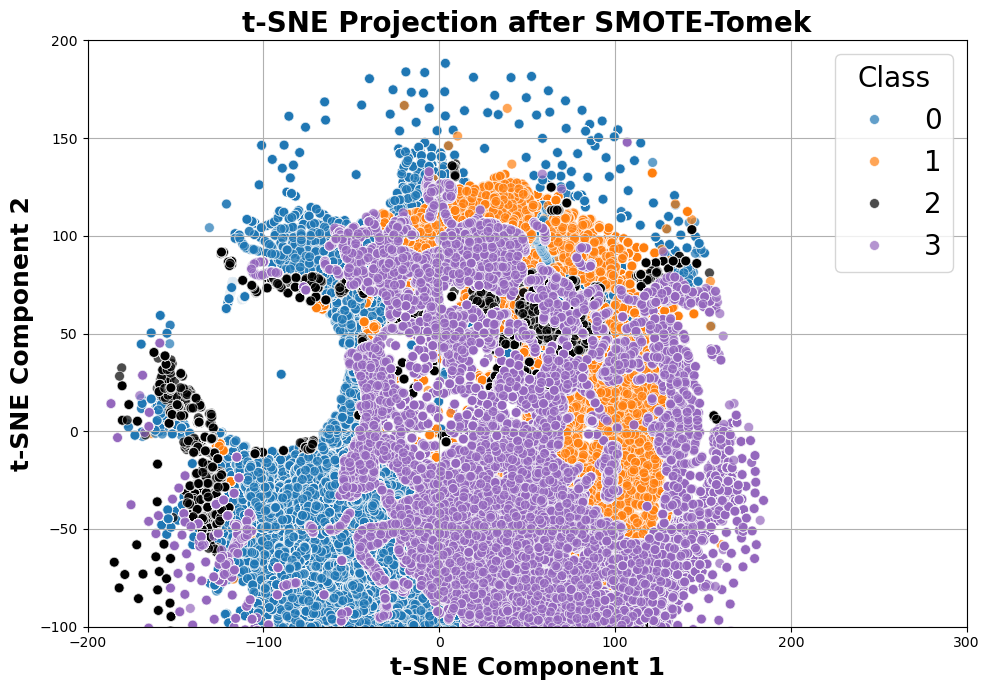

In [133]:
#CUSTOM SAMPLING STRATEGY
plt.figure(figsize=(10, 7))
palette = ['#1f77b4', '#ff7f0e', '#000000', '#9467bd']
sns.scatterplot(
    x=X_tsne_resampled[:, 0],
    y=X_tsne_resampled[:, 1],
    hue=y_resampled,
    palette=palette,
    s=50,
    alpha=0.7
)
plt.title("t-SNE Projection after SMOTE-Tomek", fontsize=20,fontweight ="bold")
plt.xlabel("t-SNE Component 1",fontsize = 18,fontweight="bold")
plt.ylabel("t-SNE Component 2",fontsize =18,fontweight = "bold")
plt.legend(title="Class", title_fontsize=20, fontsize=20)
plt.grid(True)
plt.xlim(-200, 300)
plt.ylim(-100, 200)
plt.tight_layout()
plt.show()
#Figure(G) shows the projections after SMOTE has been applied as evident the classes are much more evenly mixed and all classes can be seen
#each class has clusters which are visible and there is healthy overlap,this change seen will bring improvemnt tot he detection of each 
#class in the models that are built as applying this sampling technique brings 

In [83]:
df_tsne = pd.DataFrame(X_tsne_orig, columns=["TSNE1", "TSNE2"])
df_tsne["attack_section"] = y_train

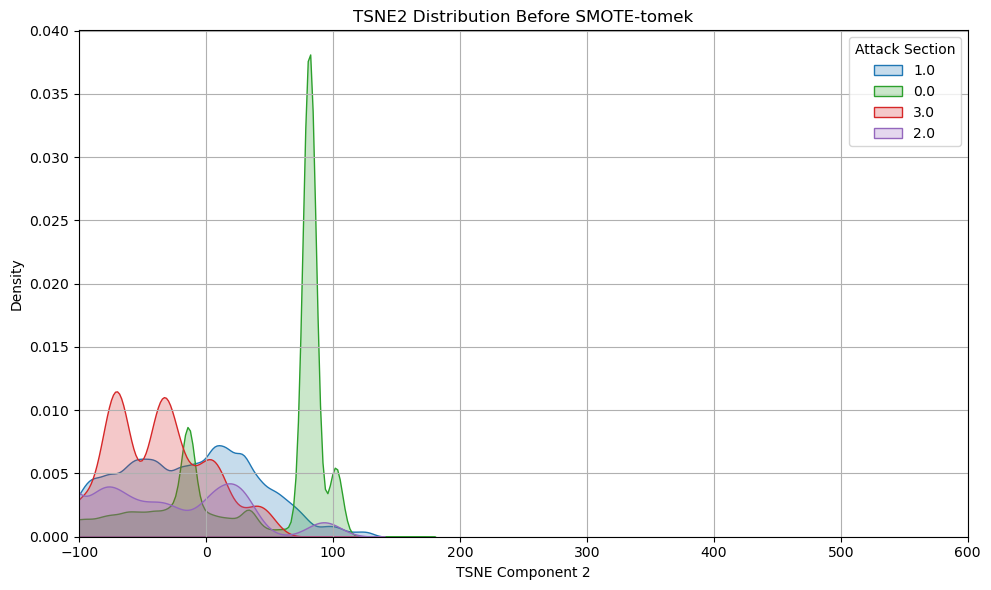